In [7]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [8]:
df_train=pd.read_csv('movies_train.csv', index_col='title')
df_test=pd.read_csv('movies_test.csv', index_col='title')
submission=pd.read_csv('movies_submission.csv', index_col='title')
data=df_train

df_train_len = len(df_train)
df_test_len = len(df_test)

In [9]:
df_train.head()

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
title,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [10]:
# corr()함수를 통해 dataframe내의 모든 변수간의 상관관계가 0.1이상인 변수만 heatmap 출력

corrmat = df_train.corr()
top_corr_features = corrmat.index
top_corr_features

Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num'],
      dtype='object')

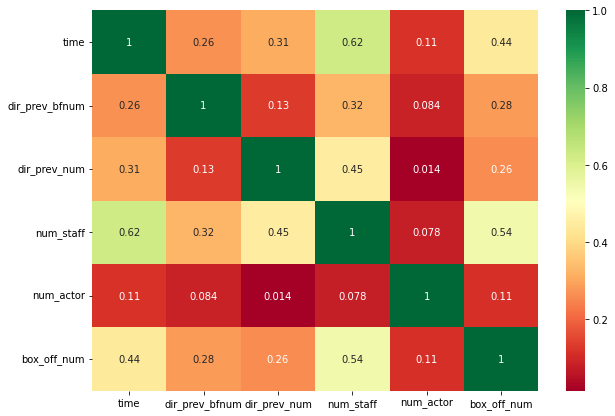

In [11]:
plt.figure(figsize=(10,7))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [12]:
df_train.drop(columns='num_actor')

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,box_off_num
title,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,23398
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,7072501
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,6959083
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,217866
불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,483387
...,...,...,...,...,...,...,...,...,...,...
해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,1475091
파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,1716438
살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,2475


In [13]:
# title : 영화의 제목
# distributor : 배급사
# genre : 장르
# release_time : 개봉일
# time : 상영시간(분)
# screening_rat : 상영등급
# director : 감독이름
# dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
# dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
# num_staff : 스텝수
# num_actor : 주연배우수
# box_off_num : 관객수

In [14]:
y_train = df_train['box_off_num']

In [15]:
# df_train = df_train[list(df_test)]
# print(list(df_train))
# print(list(df_test))

In [16]:
# all_data = pd.concat((df_train, df_test), axis=0)
# print('Length of alldata : ', len(all_data))
# print(all_data.shape)
# all_data.head()

<AxesSubplot:xlabel='num_staff', ylabel='box_off_num'>

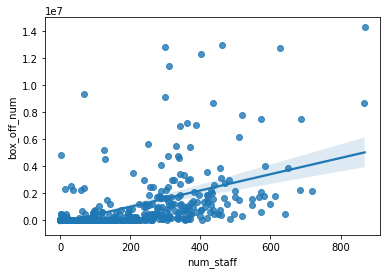

In [17]:
sns.regplot(df_train['num_staff'], df_train['box_off_num']) # num_staff

In [18]:
df_train = df_train.drop(df_train[(df_train['num_staff']>800)].index)

<AxesSubplot:xlabel='time', ylabel='box_off_num'>

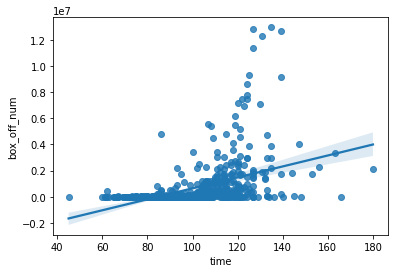

In [19]:
sns.regplot(df_train['time'], df_train['box_off_num']) # time

In [20]:
df_train = df_train.drop(df_train[(df_train['num_staff']>170)].index)

<AxesSubplot:xlabel='time', ylabel='box_off_num'>

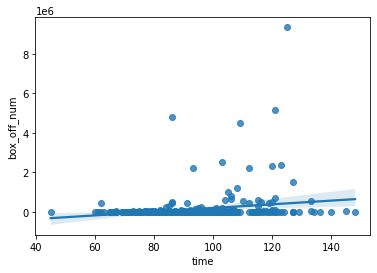

In [21]:
sns.regplot(df_train['time'], df_train['box_off_num']) # time 변수 연관관계 예측

In [22]:
# title : 영화의 제목
# distributor : 배급사
# genre : 장르
# release_time : 개봉일
# time : 상영시간(분)
# screening_rat : 상영등급
# director : 감독이름
# dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
# dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
# num_staff : 스텝수
# num_actor : 주연배우수
# box_off_num : 관객수

In [23]:
y_train = df_train['box_off_num']
df_train = df_train[list(df_test)]

In [24]:
all_data = pd.concat((df_train, df_test), axis=0)
print(all_data.shape)

(635, 10)


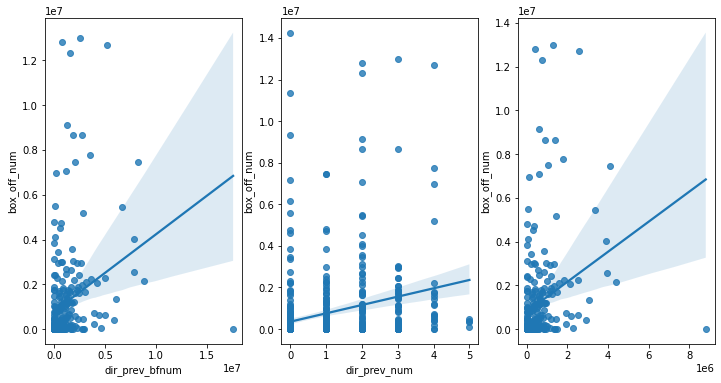

In [25]:
# 이 영화를 만들기 전 영화 관련

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(12,6)
sns.regplot(data['dir_prev_bfnum'], data['box_off_num'], ax=ax1)
sns.regplot(data['dir_prev_num'], data['box_off_num'], ax=ax2)
sns.regplot((data['dir_prev_bfnum']+data['dir_prev_num']) / 2, data['box_off_num'], ax=ax3) #'/2' for graph scaling

all_data['total_dir_prev'] = (all_data['dir_prev_bfnum']+all_data['dir_prev_num'])  / 2

In [26]:
all_data_obj = all_data.select_dtypes(include='object') # 카테고리형
all_data_num = all_data.select_dtypes(exclude='object') # 수치형

print('Object type columns:\n', all_data_obj.columns)
print('-----------------------------------------------------------------------')
print('Numeric type columns:\n', all_data_num.columns)

Object type columns:
 Index(['distributor', 'genre', 'release_time', 'screening_rat', 'director'], dtype='object')
-----------------------------------------------------------------------
Numeric type columns:
 Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'total_dir_prev'],
      dtype='object')


In [27]:
all_data_num = all_data_num.fillna(all_data_num.mean())
# 결측 값을 각열의 평균값으로 대체
all_data_num.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,total_dir_prev
title,,,,,,
개들의 전쟁,96,723615.033697,0,91,2,361808.409862
나는 공무원이다,101,23894.000000,2,20,6,11948.000000
길위에서,104,723615.033697,0,32,5,361808.409862
"1789, 바스티유의 연인들",129,723615.033697,0,3,5,361808.409862
청춘그루브,94,723615.033697,0,138,3,361808.409862


In [28]:
# Chanhe object type to dummy variables
'''
위에서 분리한 카테고리형 데이터에 one-hot encoding 적용(get_dummies())
'''
all_data_dummy = pd.get_dummies(all_data_obj, drop_first=True)
all_data_dummy

,distributor_(주) 브릿지웍스,distributor_(주) 액티버스엔터테인먼트,distributor_(주) 영화사조제,distributor_(주) 영화제작전원사,distributor_(주) 케이알씨지,distributor_(주)NEW,distributor_(주)고앤고 필름,distributor_(주)노버스엔터테인먼트,distributor_(주)다세포클럽,distributor_(주)대명문화공장,...,director_홍리경,director_홍상수,director_홍재희,director_홍형숙,director_황동혁,director_황석호,director_황욱,director_황유식,director_황윤,director_황철민
title,,,,,,,,,,,,,,,,,,,,,
개들의 전쟁,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
나는 공무원이다,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
길위에서,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1789, 바스티유의 연인들",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
청춘그루브,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해에게서 소년에게,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
울보 권투부,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
어떤살인,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Merge numeric_df & dummies_df
'''
# 위에서 각각 처리한 카테고리형 데이터와 수치형 데이터를 최종적으로 다시 하나로 merge해준다
# merge시 index 순서가 꼬이지 않게 left_index=True, right_index=True를 지정하여 merge 수행
'''

all_data = pd.merge(all_data_dummy, all_data_num, left_index=True, right_index=True)
all_data.shape

(635, 1012)

In [30]:
X_train = all_data[:len(df_train)]
X_test = all_data[len(df_train):]

X_train['box_off_num'] = y_train

print(X_train.shape)
print(X_test.shape)

(392, 1013)
(243, 1012)


In [31]:
from pycaret.regression import *

In [33]:
exp_reg = setup(X_train, #Train Data
                target = 'box_off_num',  
                session_id = 123,
                normalize = True, # 데이터 세트 정규화
                normalize_method = 'zscore', #normalize= true 경우 기본값 zscore
                numeric_features=['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor'],
                polynomial_features = True,
                trigonometry_features = True,
                remove_outliers = True,
                outliers_threshold = 0.01,
                remove_multicollinearity = True, # 다중공선성 제거
                silent = True,    # 원격 커널에서 실행할때 true            
                ignore_low_variance = True, #낮은 분산 무시
                use_gpu = True
                )

,Description,Value
0,session_id,123
1,Target,box_off_num
2,Original Data,"(392, 1013)"
3,Missing Values,False
4,Numeric Features,1012
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(271, 21)"


In [34]:
best_model = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,122462.4987,505108494916.3801,461352.4240,-0.0587,2.2411,9.7156,0.0190
par,Passive Aggressive Regressor,122090.3368,505520739743.0759,461935.7080,-0.0707,2.1431,5.6706,0.0340
dummy,Dummy Regressor,210396.2636,496049105251.0980,479321.4716,-1.2212,4.1963,795.4225,0.0030
br,Bayesian Ridge,210396.2636,496049105232.5900,479321.4716,-1.2212,4.1963,795.4225,0.0060
en,Elastic Net,219324.0389,497804763412.1066,502743.2308,-3.5495,3.9452,576.6240,0.0070
knn,K Neighbors Regressor,184301.6638,556048182200.5658,526425.6292,-1.4313,3.0104,90.8129,0.1080
omp,Orthogonal Matching Pursuit,231108.7399,531335179638.5873,529170.7958,-5.0208,3.9612,357.8972,0.0060
lightgbm,Light Gradient Boosting Machine,256378.3341,524017193676.3459,586429.2229,-15.9047,3.8789,1115.3568,0.0560
ridge,Ridge Regression,292410.6285,563116793379.5201,590249.0986,-7.9686,4.2825,909.5598,0.0070
llar,Lasso Least Angle Regression,297410.9588,571677729281.8317,597985.6658,-8.1385,4.2778,941.2264,0.0100


In [35]:
huber = create_model('huber', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,159026.2006,4.871136e+11,697935.2268,-0.0447,2.2833,8.1352


In [36]:
tuned_huber = tune_model(huber, optimize='RMSE', n_iter=10)
final_model = finalize_model(tuned_huber)
prediction_huber = predict_model(final_model, data=X_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20353.8784,2752509011.0810,52464.3594,0.0275,2.1087,8.9928
1,33953.5119,13468676250.8172,116054.6262,-0.0539,2.1816,6.8035
2,34104.5387,11352587498.4090,106548.5218,-0.0155,2.4739,57.9645
3,23903.4981,2824867981.5230,53149.4871,-0.0500,2.2915,13.6580
4,372929.4546,3241025994935.1948,1800284.9760,-0.0422,2.9651,10.6361
5,272219.9946,436139047366.8882,660408.2430,-0.1823,2.9390,86.6812
6,49230.9188,38335714721.3085,195795.0835,-0.0292,2.0598,5.1037
7,45200.5995,12326138995.5334,111023.1462,-0.0962,1.9042,2.7729
8,284688.9080,1052083617327.1052,1025711.2739,-0.0736,2.3844,7.4514


In [37]:
prediction_huber.head()

,distributor_(주) 브릿지웍스,distributor_(주) 액티버스엔터테인먼트,distributor_(주) 영화사조제,distributor_(주) 영화제작전원사,distributor_(주) 케이알씨지,distributor_(주)NEW,distributor_(주)고앤고 필름,distributor_(주)노버스엔터테인먼트,distributor_(주)다세포클럽,distributor_(주)대명문화공장,...,director_황유식,director_황윤,director_황철민,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,total_dir_prev,Label
title,,,,,,,,,,,,,,,,,,,,,
용서는 없다,0,0,0,0,0,0,0,0,0,0,...,0,0,0,125,3.005290e+05,2,304,3,1.502655e+05,23514.529868
아빠가 여자를 좋아해,0,0,0,0,0,0,0,0,0,0,...,0,0,0,113,3.427002e+05,4,275,3,1.713521e+05,21748.744892
하모니,0,0,0,0,0,0,0,0,0,0,...,0,0,0,115,4.206611e+06,3,419,7,2.103307e+06,25369.456606
의형제,0,0,0,0,0,0,0,0,0,0,...,0,0,0,116,6.913420e+05,2,408,2,3.456720e+05,28778.070593
평행 이론,0,0,0,0,0,0,0,0,0,0,...,0,0,0,110,3.173800e+04,1,380,1,1.586950e+04,23406.204401


In [38]:
prediction_huber['Label']

title
용서는 없다             23514.529868
아빠가 여자를 좋아해        21748.744892
하모니                25369.456606
의형제                28778.070593
평행 이론              23406.204401
                       ...     
해에게서 소년에게           1263.800819
울보 권투부              1677.720098
어떤살인               11141.511187
말하지 못한 비밀           4224.741839
조선안방 스캔들-칠거지악 2    -1052.834854
Name: Label, Length: 243, dtype: float64

In [39]:
submission.head()

,box_off_num
title,
용서는 없다,0
아빠가 여자를 좋아해,0
하모니,0
의형제,0
평행 이론,0


In [40]:
submission['box_off_num'] = prediction_huber['Label']
submission.to_csv('automl_prediction_huber.csv')